# **Lab 3- Filters and Convolution**
# **Computer Vision (10224)**
<img src='https://upload.wikimedia.org/wikipedia/he/thumb/9/94/%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg/560px-%D7%A1%D7%9E%D7%9C_%D7%94%D7%9E%D7%9B%D7%9C%D7%9C%D7%94.jpg'></img>	

## **Goals**
* Removing noise from images.
* Implementing image augmentations.
* Implementing template matching.

## **Preparatory report**
* Write a function which addes gaussian noise to an image, the function template is as follows: <br>
<code>def add_guassian_noise(img: np.ndarray, mean: float, sigma: float) -> np.ndarray: 
return noised_image</code>
   * Pass the parameters below to the function and observe and explain the results.:
      * mean = 0.1
      * sigma = 0.001
   * Do the same as the above with the following parameters: 
      * mean = 0
      * sigma = 5
* Write a function which removes noises, and use it to clean the noisy images from above. <br> You may choose any filter you deem right for the task.
the function template is as follows:
<code>def remove_noise(img: np.ndarray, filter: np.ndarray) -> np.ndarray: 
return clean_img</code>
   * Show the original image, noised_image and clean image using **matplotlib subplot**.
   * Show the absoulute differnce between the images and compare their histograms (using numpy).
   * Measure the MSE of the following:
     * <code> mse(source_img, noisy_image) </code>
     * <code> mse(source_img, denoised_image) </code> 
   * Do this on the two noisy images you got previously.
   * Explain the obtained scores. 
   
* Write a function which [rotates an image](https://en.wikipedia.org/wiki/Rotation_matrix), the function template is as follows: 
<code>def rotate_image(img: np.ndarray, angle: float) -> np.ndarray: 
return rotated_img </code>
   * The rotation function shouldn't alter the image dimensions. 
   * You aren't allowed to use cv2 image rotate function for this task but you may compare your results.
  
 * Review and write a short summary (up to 5 lines) of [albumentations](https://albumentations.ai/docs/).

## **Lab Session**
1. Write a class which executes the following augmentations:
    1. Flip Vertically or Horizontally (randomly each call) 
    2. Rotate 
    3. Gaussian-Blur 
    4. Median-Blur 
    5. Zoom
    6. Crop 
    7. Sharpening 

## **Final Report**
1. Complete unfinished lab session tasks.
2. Load an image of your choice and create 10 variations of the image using the augmentations you implemented.
3. Sample 10 random images you got in part 3 and show them in an image (2X5) image grid, e.g. 2 rows and 5 images per row.  
4. Optimisation - Revisit your image rotate function which you implemented in the begining of the lab, and check it's execution time. Re-implement the rotation function so the execution time is reduced by a factor of atleast 5 of your original implementation.
To check the execution time of a function simply add %time before the execution line for example:
<code> %time res = conv2d(im1, im2) </code><br>
Hint: np.meshgrid
6. Write a short TL;DR (too long didn’t read) summary to describe your solution and what you have learned from this lab.


## **Guidelines**
1. Code written in the assignments MUST follow the PEP-8 guidelines, we will deduct points of code not following this guideline, points will be accumulated.
2. You may use either Google Colab or Local Jupyter notebook session.
3. Use Markdown cells in-between your code cells to explain what you’ve done.
4. Assignments must be submitted as .html with all the required plots.
Some exercises will require online reading, you may use Google and stackoverflow for inspiration, although if you use it make sure to attach the reference link. 
5. Add as much comments you need to explain yourself, you wouldn’t want to assume we fully understand your
intuition.
6. Code should be well ordered, formatted and readable.


## Imports 

In [1]:
import numpy as np 
from numpy import pi 
from numpy.random import MT19937, RandomState, SeedSequence
import cv2
from matplotlib import pyplot as plt
from scipy.signal import  convolve2d
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline 

## Set GOOGLE DRIVE

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import sys
# path = # TODO - add the image path
# sys.path.append(path)

## Image to process 

In [ ]:
# !wget http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg -O messi.jpg
# !wget https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL -O monkey.jpg

--2021-03-07 17:33:04--  http://www.turtleluck.com/wp-content/uploads/2014/06/Lionel-Messi.jpg
Resolving www.turtleluck.com (www.turtleluck.com)... 209.124.66.9
Connecting to www.turtleluck.com (www.turtleluck.com)|209.124.66.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37353 (36K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  36.48K   199KB/s    in 0.2s    

2021-03-07 17:33:04 (199 KB/s) - ‘messi.jpg’ saved [37353/37353]

--2021-03-07 17:33:04--  https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL
Resolving media.pri.org (media.pri.org)... 65.8.246.10, 65.8.246.100, 65.8.246.23, ...
Connecting to media.pri.org (media.pri.org)|65.8.246.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426010 (416K) [image/jpeg]
Saving to: ‘monkey.jpg’

monkey.jpg          100%[===================>] 416.03K  --.-KB/s    in 0.09s   

2021-03-07

In [2]:
img = cv2.imread('ImageForLab.jpeg') # TODO - change the file name to your image file
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## LAB Session

## Introduction to meshgrid

[meshgrid](https://numpy.org/doc/2.2/reference/generated/numpy.meshgrid.html) takes two 1D arrays representing the x and y coordinates and outputs two 2D arrays, which represent the grid's x and y coordinates, respectively. This is particularly useful for creating a grid of points to evaluate functions or generate visualizations in 2D or 3D.

In [33]:
def draw_circle(radius: int, size: int=256):
  x = np.arange(0, size, 1)
  y = np.arange(0, size, 1)
  xx, yy = np.meshgrid(x, y)
  r = np.sqrt((xx - size // 2)**2 + (yy - size //2)**2)
  image = np.zeros((size, size))
  mask = r[xx, yy] >= radius
  image[~mask] = 255
  return image

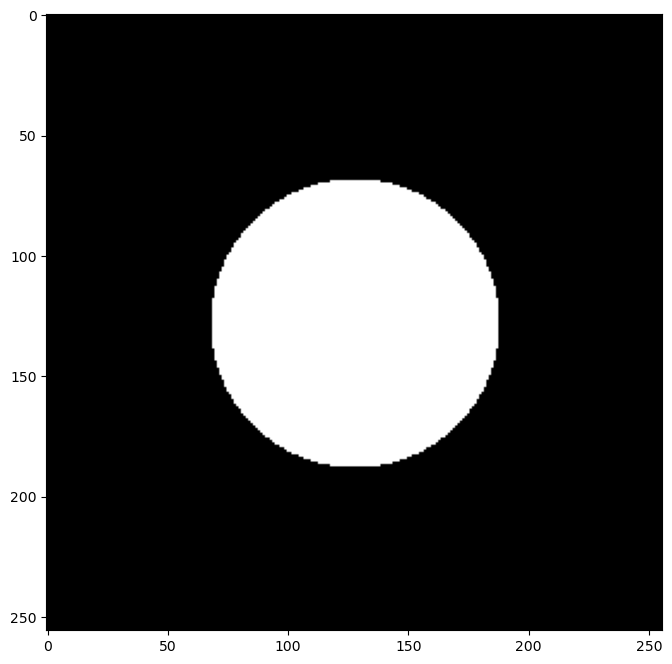

In [34]:
plt.figure(figsize=(12, 8))
my_circ = draw_circle(60)
plt.imshow(my_circ, cmap="gray")

## Optimised image rotate

Use the function <code>get_rot_matrix</code> to rotate your image.
Print the images shape.

**Instruction:** Define the center of the image, rotating the image around its center, perform the rotation using the rotation matrix.

**Note:** The shape of the input and the output image needs to be the same!


In [14]:
def get_rot_matrix(theta):
  #   The value of theta is in radians
  cos , sin = np.cos(theta), np.sin(theta)
  return np.array(([cos, -sin], [sin, cos]), dtype='float')

In [12]:
# Your code goes here
def rotate(npimg,degree):
    theta = np.deg2rad(degree)
    newimg = np.copy(npimg)
    width, height = npimg.shape
    rot_mat = get_rot_matrix(theta)
    for i in range(width):
        for j in range(height):
            newimg[i][j] = rot_mat.dot(npimg[i][j])    
    

In [15]:
test = rotate(img,90)
plt.figure(figsize=(20, 16))
plt.imshow (test) 


ValueError: setting an array element with a sequence.

(401, 606) (401, 606)


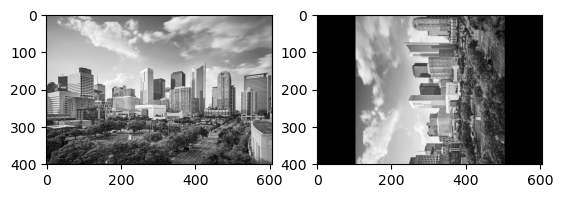

In [45]:
print(output.shape, img.shape)
plt.subplot(121)
plt.imshow(img,'gray')
plt.subplot(122)
plt.imshow(output,'gray')

## Vertical and Horizonal Flip 



### Little demo horizontal and vertical flip

In [16]:
A = np.array(((1,2),(3,4),(5,6)))
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
A[:,::-1] # flips between the columns

array([[2, 1],
       [4, 3],
       [6, 5]])

In [ ]:
A[::-1,:]

array([[5, 6],
       [3, 4],
       [1, 2]])

In [17]:
np.flip(A,axis=0)

array([[5, 6],
       [3, 4],
       [1, 2]])

In [18]:
np.flip(A,axis=1)

array([[2, 1],
       [4, 3],
       [6, 5]])

## Vertical Flip 

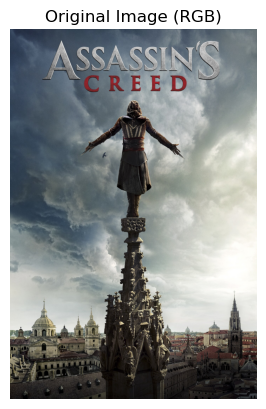

In [33]:
city_color = cv2.imread('ImageForLab.jpeg') # TODO - change the file name to your image file
city_color = cv2.cvtColor(city_color, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(city_color)
plt.axis("off")  # Hide axes for a cleaner look
plt.title("Original Image (RGB)")
plt.show()


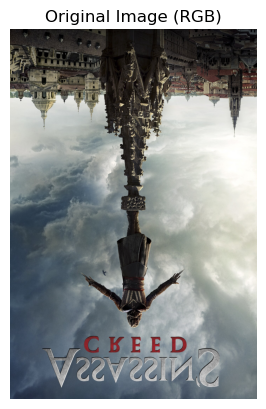

In [38]:
vertical_flipped = np.flip(city_color,axis=0)# TODO - do vertical flip to your image
plt.imshow(vertical_flipped)
plt.axis("off")  # Hide axes for a cleaner look
plt.title("Original Image (RGB)")
plt.show()


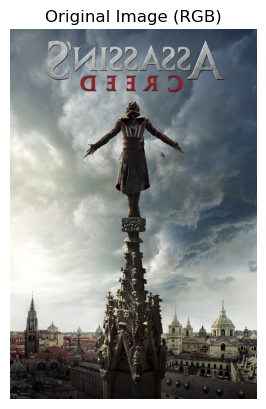

In [39]:
horizontal_flipped = np.flip(city_color,axis=1) # TODO - do horizontal flip to your image
plt.imshow(horizontal_flipped)
plt.axis("off")  # Hide axes for a cleaner look
plt.title("Original Image (RGB)")
plt.show()

## 2D Gaussian Blur

<space></space>
$\huge G(x,y) = \frac{1}{2 \pi \sigma^2} \huge e^{-\frac{x^2 + y^2}{2 \sigma^2}}$

where $x$ is the distance from the origin in the horizontal axis, $y$ is the distance from the origin in the vertical axis, and $\sigma$ is the standard deviation of the Gaussian distribution.

**Note:** The origin on these axes are the center $(0, 0)$.

Implement the <code>get_gaussian_filter</code> function. You may use <code>np.meshgrid</code> to optimize your implementation.

**Keep in mind** that the convolution is around the kernel center.


In [24]:
def get_gaussian_filter(kernel_size, sigma):
    # Your code goes here
    kernel = np.zeros((kernel_size, kernel_size))
    
    center = kernel_size // 2 
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i - center, j - center  # Shift indices to center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    return kernel / np.sum(kernel) 


(51, 51)


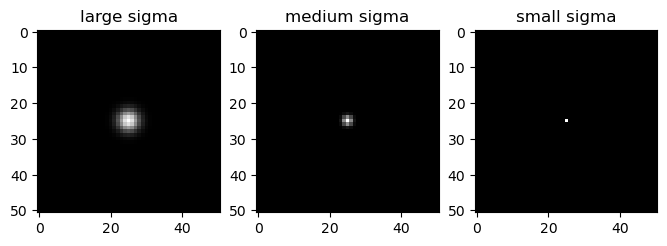

In [25]:
gausssian_large_sigma = get_gaussian_filter(kernel_size=51, sigma=2)
gaussian_medium_sigma = get_gaussian_filter(kernel_size=51, sigma=0.9)
gaussian_small_sigma = get_gaussian_filter(kernel_size=51, sigma=0.1)

print(gausssian_large_sigma.shape)
plt.figure(figsize=(8,24))

plt.subplot(131)
plt.imshow(gausssian_large_sigma, 'gray')
plt.title('large sigma')

plt.subplot(132)
plt.title('medium sigma')
plt.imshow(gaussian_medium_sigma, 'gray')

plt.subplot(133)
plt.title('small sigma')
plt.imshow(gaussian_small_sigma, 'gray')

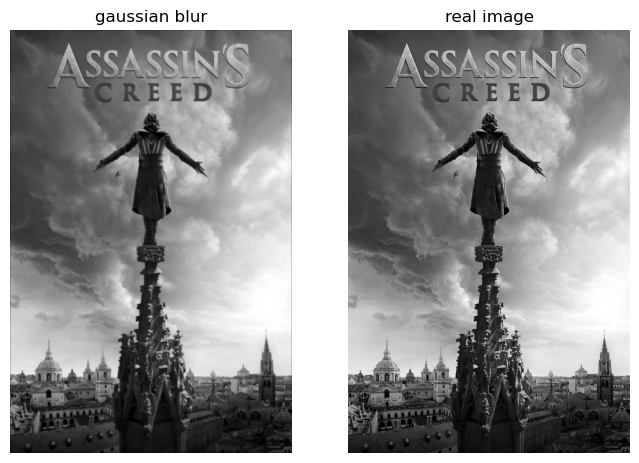

In [42]:
gaussian_kernel = get_gaussian_filter(kernel_size=19, sigma=2.1)
blurred_img_medium_sigma = convolve2d(img, gaussian_kernel, mode='same')
plt.figure(figsize=(8, 12))
plt.subplot(121)
plt.axis("off") 
plt.imshow(blurred_img_medium_sigma, cmap='gray')
plt.title('gaussian blur')
plt.subplot(122)
plt.axis("off") 
plt.imshow(img, cmap='gray')
plt.title('real image')
plt.show()

## Median Filter

Implement the <code>median_single_channel</code> function.
Don't forget to define the region of interest (the area around the pixel centered at $(i, j)$).

**Note:** The filtered image has the same shape of the original image

In [43]:
def median_single_channel(img, kernel_size):
    # Your code goes here
    height, width = img.shape
    new_img = np.zeros((height, width), dtype=np.uint8)


    for y in range(height - kernel_size + 1):  # Loop over Y-axis (rows)
        for x in range(width - kernel_size + 1):  # Loop over X-axis (columns)
            end_x = x+kernel_size
            end_y = y+kernel_size
            sub_matrix = img[y:end_y, x:end_x].flatten()
            median_value = np.median(sub_matrix)
            new_img[y,x] = median_value
            
    return new_img


def calc_padding(dim_out, dim_in, kernel_size):
  return int(np.ceil((dim_out - dim_in + kernel_size) / 2) - 1)

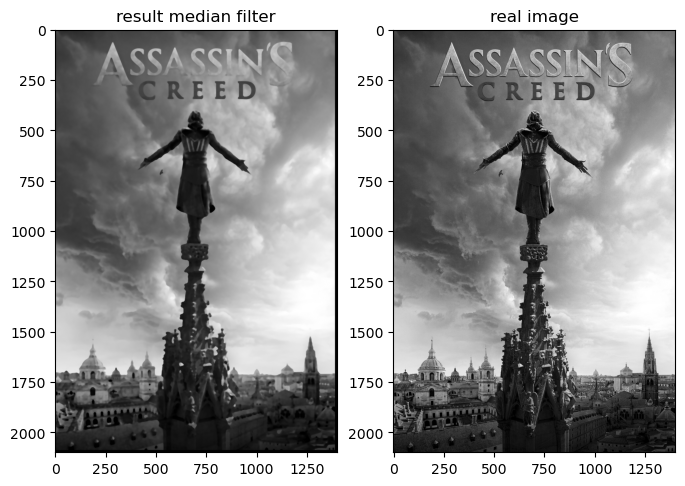

In [44]:
med_img = median_single_channel(img, 11)
plt.figure(figsize=(8, 12))
plt.subplot(121)
plt.imshow(med_img, 'gray')
plt.title('result median filter')
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('real image')
plt.show()

## Crop

Cropping an image involves selecting and extracting a specific region from the original image, effectively reducing its size and focusing on a particular area of interest. This process is commonly used for removing unwanted background, improving composition, or zooming in on key details.

Crop the image using the bounding box. Adjust the bounding box values to select the region of interest. The cropped image should focus on the key elements of the image (foreground).

In [87]:
#       x1, y1, x2, y2 
bbox = [50, 50, 250,270]
cropped_img = # TODO - Crop the image using the bounding box

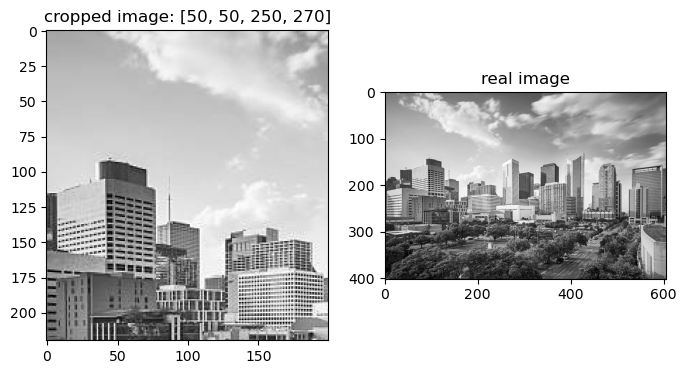

In [88]:
plt.figure(figsize=(8, 12))
plt.subplot(121)
plt.imshow(cropped_img,'gray')
plt.title('cropped image: '+str(bbox))
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('real image')
plt.show()

## ZOOM
Implement the <code>zoom_img</code> function. If the zoom value is grater than 1 zoom out, if zoom value is less than 1 zoom in.
The zoomed image should retain the original dimensions of the image.

**Hint:** To zoom in, crop the desired region from the original image and then resize the cropped image to the original size. For zooming out, resize the image and pad it with zeros to match the original dimensions.

**Note:** Resizing the image involves using **interpolation**.

In [133]:
def zoom_img(img, zoom_x=1, zoom_y=1):
    # Your code goes here

    return output

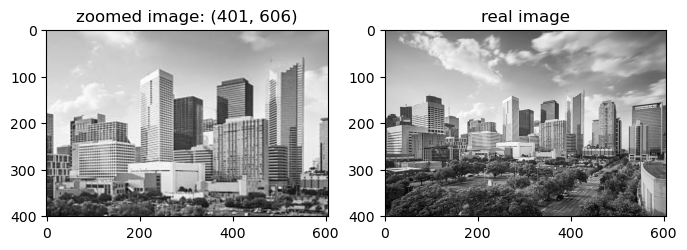

In [137]:
zoomed_image = zoom_img(img, 0.5, 0.5)
plt.figure(figsize=(8, 12))
plt.subplot(121)
plt.imshow(zoomed_image, cmap='gray')
plt.title('zoomed image: '+str(zoomed_image.shape))
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.title('real image')
plt.show()

## Sharpening

Sharpening is a common method image processing used to enhance fine details and improve clarity while maintaining the overall structure of the image.

The sharpening filter is defined as:
<space></space>
$\Large S = \delta + \alpha \mathcal{L}$

where $\mathcal{L}$ represents a second order derivative operator that emphasizes edges by detecting areas with rapid intensity change, $\delta$ is a matrix that preserves the original image, and $\alpha \geq 0$ is a scaling factor.

What happens when $\alpha = 0$? And what happens when $\alpha >> 0$?

Apply the sharpening filter to sharp your image, adjusting the value of alpha to explore and answer these questions.

In [57]:
alpha = 0.95
img = cv2.imread('PIC1.jpg')
laplacian = np.array((
	[-1, -1, -1],
	[-1, 8, -1],
	[-1, -1, -1]), dtype="int") 

delta = np.array(([0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]))

laplacian2 = np.array((
	[-1, -1, -1],
	[-1, 17, -1],
	[-1, -1, -1]), dtype="int") 

sharpfilter = laplacian2*1/9

sharpened_img = cv2.filter2D(img, -1, sharpfilter)


In [58]:
# Your code goes here

Text(0.5, 1.0, ' normalized sharpened_img max value:1.0')

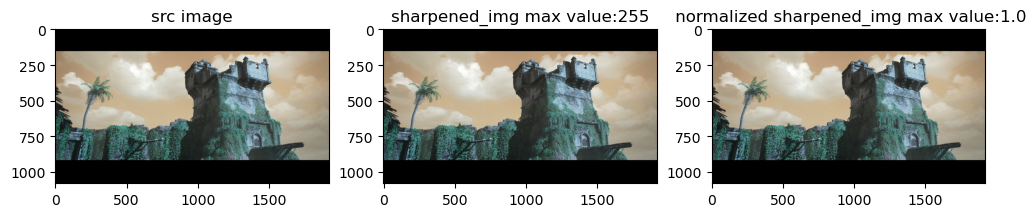

In [59]:
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('src image')
plt.subplot(1, 3, 2)
plt.imshow(sharpened_img,cmap='gray')
plt.title("sharpened_img max value:"+str(sharpened_img.max())[:4])
plt.subplot(1, 3, 3)
normalized_sharpened_img = sharpened_img / sharpened_img.max()
plt.imshow(normalized_sharpened_img,cmap='gray')
plt.title(" normalized sharpened_img max value:" +
          str(normalized_sharpened_img.max()))


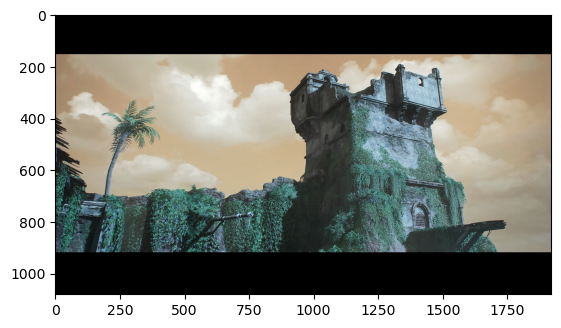

In [60]:
plt.imshow(sharpened_img,cmap='gray')

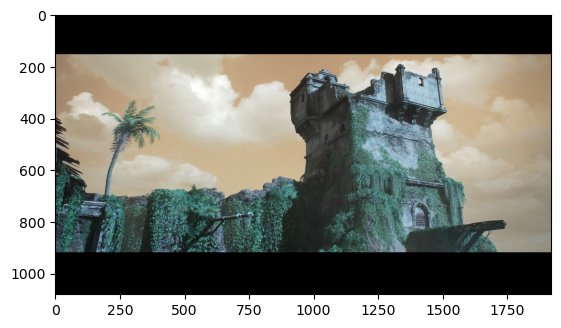

In [61]:
plt.imshow(img,cmap='gray')